In [2]:
from __future__ import print_function, division
%run basics.ipynb

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Loading BokehJS ...

Using Theano backend.


In [3]:
df = pd.read_pickle('udacity_courses.df')
print(df.columns)
df.head(2)

Index([u'id', u'title', u'homepage', u'subtitle', u'level', u'starter',
       u'image', u'banner_image', u'teaser_video', u'summary',
       u'short_summary', u'required_knowledge', u'expected_learning',
       u'featured', u'syllabus', u'faq', u'full_course_available',
       u'expected_duration', u'expected_duration_unit', u'new_release',
       u'transcripts_url', u'transcripts_zip_fn', u'transcript'],
      dtype='object')


,id,title,homepage,subtitle,level,starter,image,banner_image,teaser_video,summary,...,featured,syllabus,faq,full_course_available,expected_duration,expected_duration_unit,new_release,transcripts_url,transcripts_zip_fn,transcript
0,bio110,Tales from the Genome,https://www.udacity.com/course/tales-from-the-...,Introduction to Genetics for Beginners,beginner,False,https://lh5.ggpht.com/Fh07_XbT61CGDWsQoOMQaIeH...,https://lh4.ggpht.com/_AHqr0EXcLBzF0rrwtBagE0t...,https://www.youtube.com/watch?v=sEXrjh-tme8,This course is a journey into the biology of t...,...,False,## Lesson 1: Introduction to traits and heredi...,NaN,False,3,months,False,https://www.udacity.com/course/progress#!/c-bi...,transcripts_zips/bio110.zip,In the same way that our genomes influence tr...
1,cs046,Intro to Java Programming,https://www.udacity.com/course/intro-to-java-p...,Building Programs with Classes & Objects,beginner,False,https://lh4.ggpht.com/9ytiUdz0QYHwuMJFTXcNXZn4...,https://lh3.ggpht.com/AdAALPYhCsWuIvDl0ZY6zIW2...,https://www.youtube.com/watch?v=Wsp5Rrenoq4,"In this introductory course, you'll learn and ...",...,False,"### Lesson 1: Introduction to Computers, Progr...",NaN,True,4,months,False,https://www.udacity.com/course/progress#!/c-cs046,transcripts_zips/cs046.zip,"Hi, I'm Cay. I'm Sara. We'll be the instructo..."


In [4]:
df_prereq = pd.read_csv('udacity_prereq_graph.csv')
df_prereq.head(2)

,u_id,u_pre_req_id
0,cs222,cs101
1,cs222,ph100


In [5]:
def is_prereq(a, b, preq):
    a_p = preq[preq['u_id'] == a]
    if len(a_p) > 0:
        if b in a_p['u_pre_req_id'].values.tolist():
            return True
        else:
            return False
    else:
        return False

In [6]:
df.count()

id                        129
title                     129
homepage                  129
subtitle                  127
level                     128
starter                   129
image                     128
banner_image              114
teaser_video               46
summary                   129
short_summary             127
required_knowledge        127
expected_learning         127
featured                  129
syllabus                  129
faq                        18
full_course_available     129
expected_duration         129
expected_duration_unit    124
new_release               129
transcripts_url           129
transcripts_zip_fn        127
transcript                129
dtype: int64

In [7]:
fields = ['title', 'subtitle', 'summary', 'short_summary', 'syllabus']
df['all-text'] = df[fields[0]].copy()
for f in fields[1:]:
    df['all-text'] += ' ' + df[f]
df['all-text'] = df['all-text'].apply(text_cleanup)
df['all-text'].head(2)

0    tales from the genome introduction to genetics...
1    intro to java programming building programs wi...
Name: all-text, dtype: object

In [8]:
len(df)

129

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, min_df=5, ngram_range=(1, 3))
text = df['all-text']
tfidf = vectorizer.fit_transform(text.values)
tfidf, words = filter_word_rep(tfidf, vectorizer.get_feature_names())
print(tfidf.shape)

(129, 930)


v v v v 	Topic #0	v v v v v

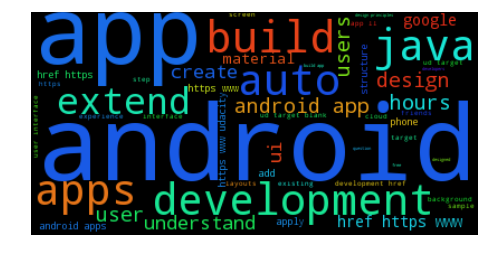

v v v v 	Topic #1	v v v v v

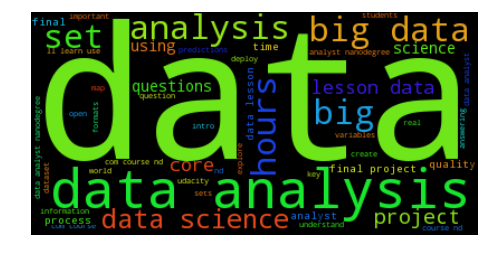

v v v v 	Topic #2	v v v v v

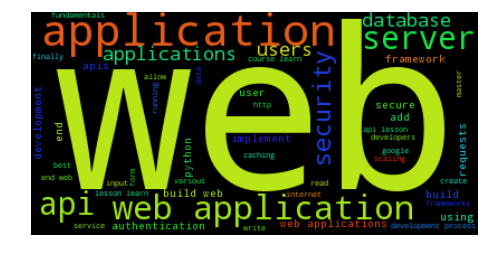

v v v v 	Topic #3	v v v v v

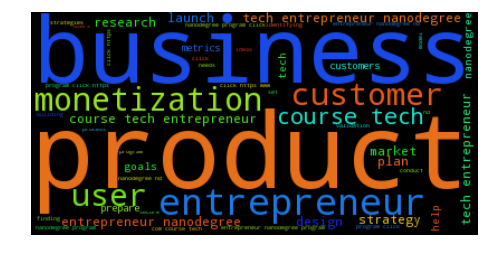

v v v v 	Topic #4	v v v v v

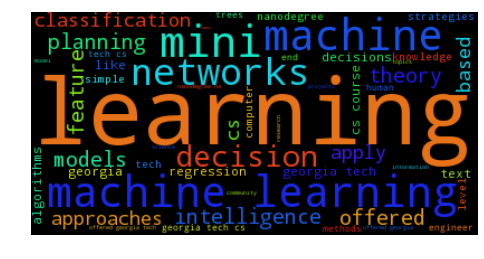

v v v v 	Topic #5	v v v v v

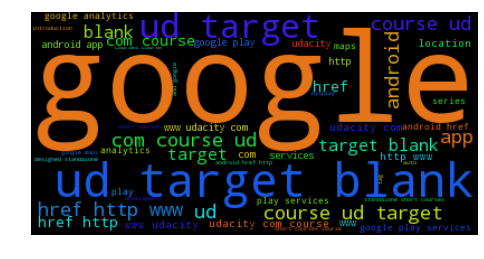

v v v v 	Topic #6	v v v v v

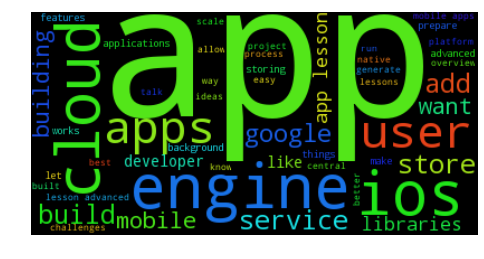

v v v v 	Topic #7	v v v v v

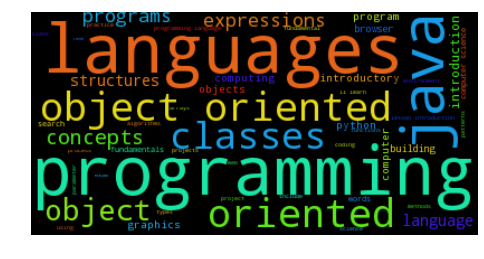

v v v v 	Topic #8	v v v v v

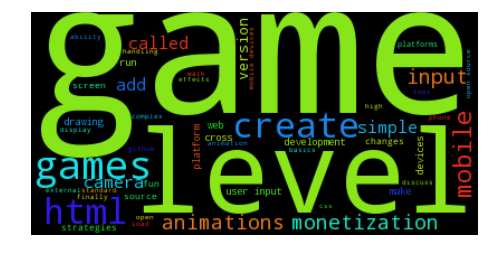

v v v v 	Topic #9	v v v v v

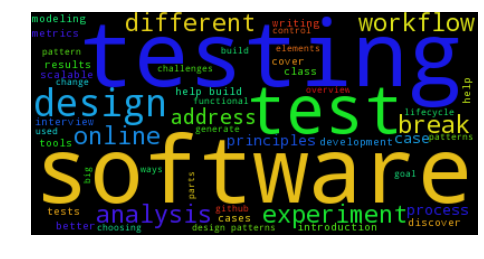

v v v v 	Topic #10	v v v v v

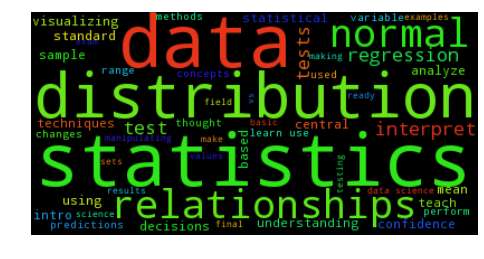

v v v v 	Topic #11	v v v v v

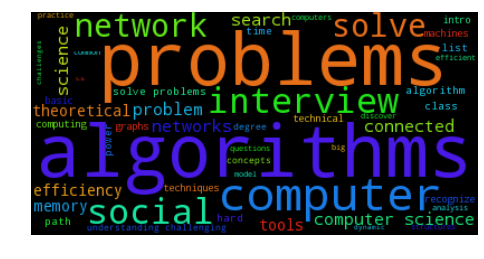

v v v v 	Topic #12	v v v v v

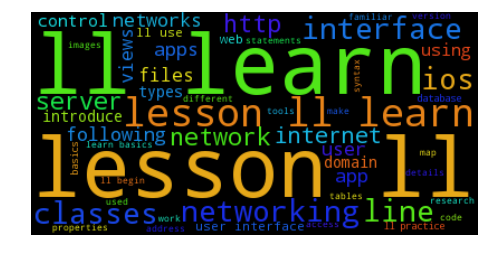

v v v v 	Topic #13	v v v v v

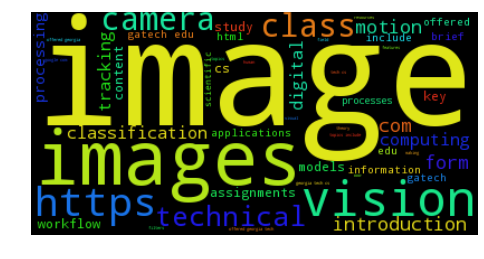

v v v v 	Topic #14	v v v v v

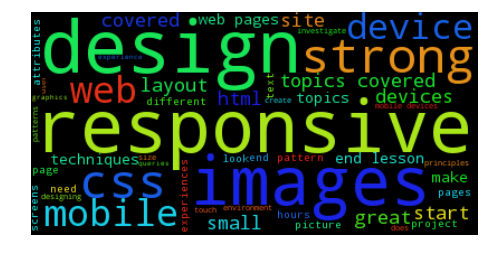

v v v v 	Topic #15	v v v v v

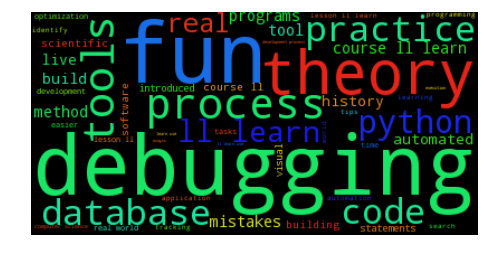

v v v v 	Topic #16	v v v v v

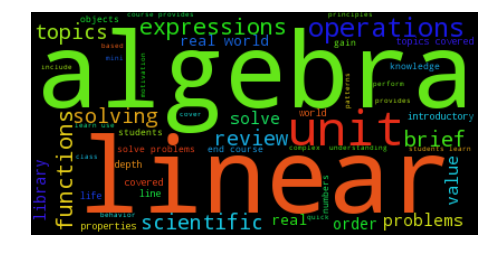

v v v v 	Topic #17	v v v v v

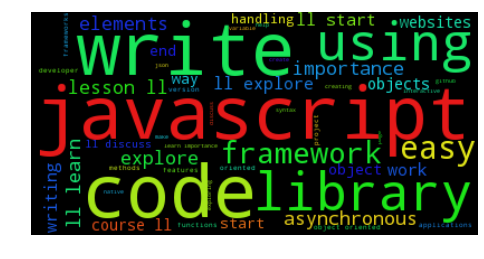

v v v v 	Topic #18	v v v v v

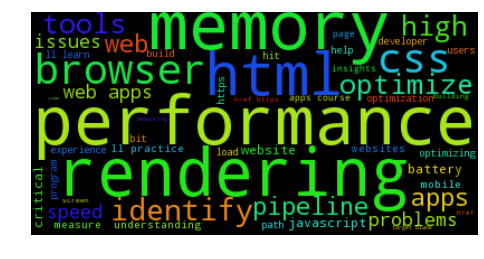

v v v v 	Topic #19	v v v v v

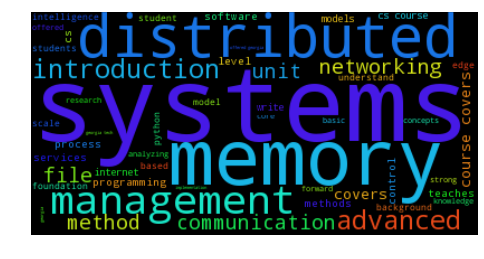

In [10]:
from sklearn.decomposition import NMF
n_topics = 20
n_top_words = 50
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

feature_names = words
topic_dict = dict()
for topic_idx, topic in enumerate(nmf.components_):
    print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
    topic_top_words = [feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
    text_freq = zip(topic_top_words, topic_top_words_vals)
    wordcloud(text_freq)
    topic_top_words = ", ".join(topic_top_words)
    #print(topic_top_words)
    topic_dict[topic_idx] = text_freq

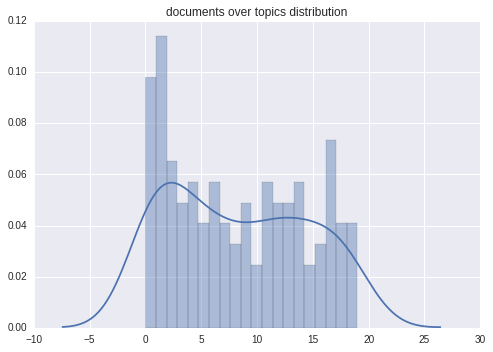

In [11]:
transformed = nmf.transform(tfidf)
sns.distplot(transformed.argmax(axis=1).flatten(), bins=n_topics)
plt.title('documents over topics distribution')
plt.show()

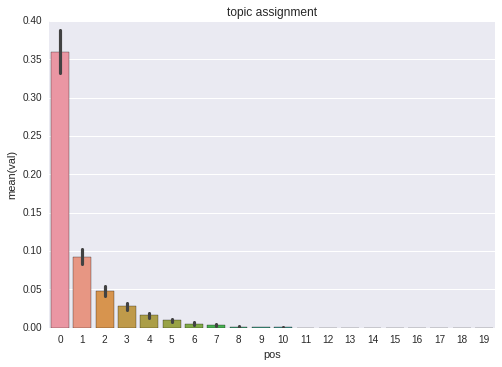

In [13]:
data = list()
for r in transformed:
    for idx, i in enumerate(sorted(r, reverse=True)):
        data.append((idx, i))
dist_df = pd.DataFrame(columns=['pos', 'val'], data=data)
sns.barplot(x='pos', y='val', data=dist_df)
plt.title('topic assignment')
plt.show()

In [14]:
tsne = TSNE(n_components=2, learning_rate=500, n_iter=1000000, random_state=2016)
tsne_text = tsne.fit_transform(transformed) # [n_samples, n_features]
plot_df = pd.DataFrame(columns=['x', 'y'], data=tsne_text)
plot_df['title'] = df['title'].apply(lambda x: x.replace('- VideoLectures.NET', "")) # add info for hovering
#plot_df = plot_df[plot_df['tags'].apply(lambda x: x[0] != 'nan')]
print(len(plot_df))
hover = HoverTool(
    tooltips=[("T", "@title")]
)

source = ColumnDataSource(plot_df)
p = figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)
# Add the hover tool
p.add_tools(hover)

# Populate glyphs
p.circle(x='x', y='y', size=7, alpha=0.5, source=source)
#p = Scatter(plot_df, title="scat", width=800, tools=[hover, "pan","box_zoom","wheel_zoom","reset","resize","save"])
show(p)

129
